## 这个demo仅仅为实现最为简单的逻辑回归

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

pdData = pd.read_csv('LogiReg_data.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [41]:
pdData.shape

(100, 3)

Text(0, 0.5, 'Exam 2 Score')

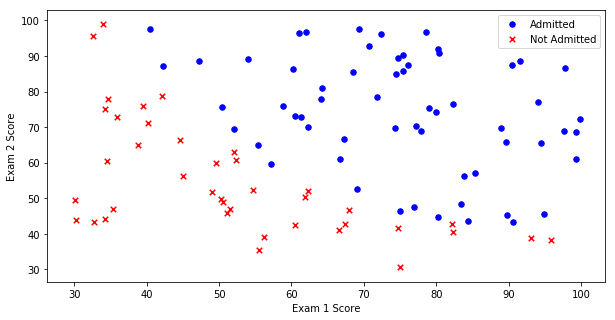

In [42]:
# 被录取的学生
positive = pdData[pdData['Admitted'] == 1] 
# 没有被录取的学生
negative = pdData[pdData['Admitted'] == 0]

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

sigmoid : 映射到概率的函数
$$
g(z) = \frac{1}{1+e^{-z}}   
$$

In [116]:
def sigmoid(z):
    #传递进来的是个矩阵，类似的计算数据如下
    #输入：v1 = np.array([[1,2,3],[4,5,6]])
    #输出：[[0.73105858 0.88079708 0.95257413]
    #       [0.98201379 0.99330715 0.99752738]]
    return 1 / (1 + np.exp(-z))

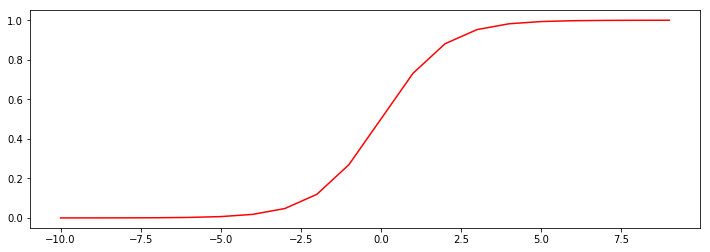

In [117]:
# 创建出来一系列的点
nums = np.arange(-10, 10, step=1) 
fig, ax = plt.subplots(figsize=(12,4))
# 测试sigmoid函数的图像输出
ax.plot(nums, sigmoid(nums), 'r')

## -----------------------------------------------------------------------------------------------------------------------------
下边这个式子 
 $$h_{\theta }\left ( x \right )=g\left ( \theta ^{T}x \right )=\frac{1}{1+e^{-\theta ^{T}x}}$$
$$\theta _{0}+\theta _{1}x_{1}+\theta _{2}x_{2}+\cdots +\theta _{n}x_{n}=\sum_{i=1}^{m}\theta _{i}x_{i}=\theta ^{T}x$$

In [110]:
def model(X, theta):
    # 相当于将上边标记中的第二个式子带入第一个式子   算出h_𝜃(x)
    # np.dot(X, theta.T) X是100行3列的矩阵，theta.T是3行1列的矩阵，他俩的点乘的结果是100行1列的矩阵
    # 经过sigmoid计算函数以后，返回的数据还是100行1列的矩阵
    return sigmoid(np.dot(X, theta.T))

In [47]:
# 原数据插入一行x_0=1
pdData.insert(0, 'Ones', 1)
orig_data = pdData.as_matrix() # convert the Pandas representation of the data to an array useful for further computations
cols = orig_data.shape[1]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
# X值
X = orig_data[:,0:cols-1]
# y值
y = orig_data[:,cols-1:cols]
theta = np.zeros([1, 3])
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

## --------------------------------------------------------------------------------------------------------------------------------
最大似然估计取对数
$$
l\left ( \theta  \right )=logL\left ( \theta  \right )=\sum_{i=1}^{m}\left ( y_{i}log\left ( h_{\theta }\left ( x_{i} \right ) \right ) +\left ( 1-y_{i} \right )log\left ( 1-h_{\theta }\left ( x_{i} \right ) \right ) \right )
$$
到这里就是求出使得$l\left ( \theta  \right )$最大时候的$\theta$。同样可以添加系数，得到这个式子：$J\left ( \theta  \right )=-\frac{1}{m}l\left ( \theta  \right )$利用梯度下降求出$\theta$的值。
$J\left ( \theta  \right )$可以看做损失值，当然是越小越好

In [49]:
def cost(X, y, theta):
    #翻译上边标记中的式子，算出J_𝜃的值
    # y.shape #(100, 1)     
    # np.log(model(X, theta)).shape #(100, 1)
    # left (100, 1)
    left = np.multiply(y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left + right) / (-len(X))

In [128]:
cost(X, y, theta)
# np.log(model(X, theta)).shape #(100, 1)
# y.shape #(100, 1)
# left = np.multiply(y, np.log(model(X, theta)))#(100, 1)

0.6931471805599453

## -------------------------------------------------------------------------------------------------------------------------------
梯度公式：$\frac{\partial J\left ( \theta  \right )}{\partial\theta _{j}}=\frac{1}{m}\sum_{i=1}^{m}\left ( h_{\theta }\left ( x_{i} \right ) -y_{i}\right )x_{i}^{j}$

In [157]:
# 模拟梯度计算公式
def gradient(X, y, theta):
    #初始化一个默认梯度   
    grad = np.zeros(theta.shape)
    #(model(X, theta)- y) 是二维的 (100,1)
    #(model(X, theta)- y).ravel() 是一维的 (100,)
    # for循环中的 term 是一维的 (100,)
    error = (model(X, theta)- y).ravel()
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    return grad

## -------------------------------------------------------------------------------------------------------------------------------
进行梯度下降
$$\theta_{j} = \theta_{j} - \alpha \frac{\partial J\left ( \theta  \right )}{\partial \theta _{j}}$$
$$\theta_{j} = \theta_{j} - \alpha \frac{1}{m}\sum_{i=1}^{m}\left ( h_{\theta \left ( x_{i} \right )}-y_{i} \right )x_{i}^{j}$$

In [158]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值

    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

## ----------------------------------------------------------------------------------------------------------------------------
   接下来的就是不同的梯度下降效果比较，暂时不做过多研究

In [52]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [53]:
import numpy.random
#洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

In [55]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 10000 iterations
Theta: [[-0.00062119  0.00816978  0.00267043]] - Iter: 10000 - Last cost: 0.63 - Duration: 1.94s


array([[-0.00062119,  0.00816978,  0.00267043]])

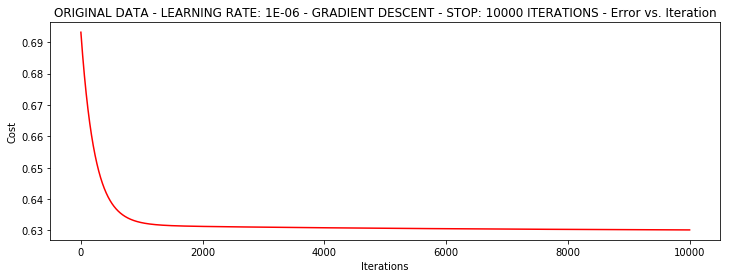

In [159]:
n=100
runExpe(orig_data, theta, n, STOP_ITER, thresh=10000, alpha=0.000001)